In [62]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve

In [89]:
clients = pd.read_csv('data/samples/CLIENTS_SAMPLE.csv')
features = pd.read_csv('data/features/features_2.csv')

dataset = pd.merge(clients, features, left_on='CLIENT_ID', right_on='client_id').drop(columns=['client_id', 'CLIENT_ID'])
train_dataset = dataset[dataset['IS_TRAIN'] == True].drop(columns=['IS_TRAIN'])

X = train_dataset.drop(columns=['TARGET'])
y = train_dataset['TARGET']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Preprocess features by scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    n_jobs=8,
    random_state=42,
)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred_proba = model.predict_proba(X_valid)[:, 1]

Gini Coefficient:  0.4737373737373738


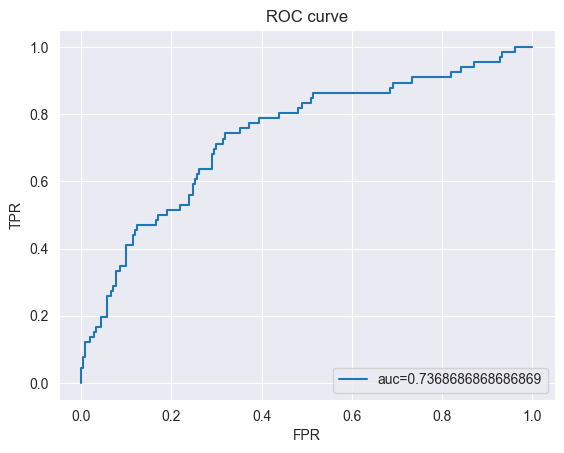

In [121]:
roc_auc = roc_auc_score(y_valid, y_pred_proba)
gini_coef = 2 * roc_auc - 1
print('Gini Coefficient: ', gini_coef)

# Roc curve
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba)
plt.plot(fpr, tpr, label='auc=' + str(roc_auc))
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [122]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.70      0.78       210
        True       0.42      0.71      0.53        66

    accuracy                           0.70       276
   macro avg       0.65      0.70      0.65       276
weighted avg       0.77      0.70      0.72       276



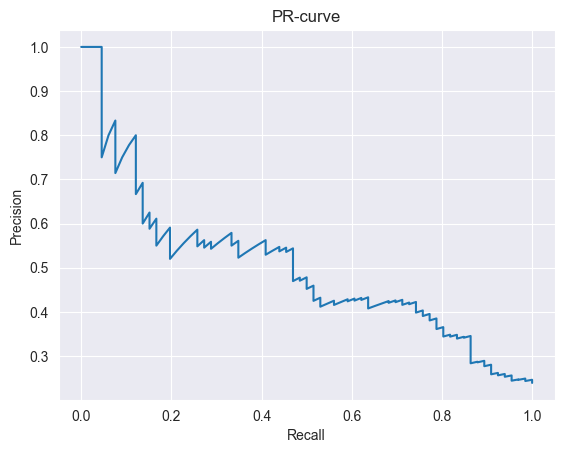

In [123]:
# PR-curve
precision, recall, _ = precision_recall_curve(y_valid,  y_pred_proba)
plt.plot(recall, precision)
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()